# Segment Analysis of clients using Credit Card Data

The objective of this study is to apply clustering techniques to understand the market. 
One application of this type of study is in marketing campaigns, by understanding the different consumer profiles. 

Some of the concepts that will be presented in this project are:
- Clustering
- Dimensionality reduction using PCA

## 1 - Loading the Libraries and the File

In [1]:
#Analysis and visualization
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Scaling the data
from sklearn.preprocessing import StandardScaler

#For clustering
from sklearn.cluster import KMeans

#For reduction of dimensionality
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
credit_data = pd.read_csv('../input/ccdata/CC GENERAL.csv')
credit_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Checking the size of the dataset and some basic information on the data:

In [3]:
credit_data.shape

(8950, 18)

In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
credit_data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
credit_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Summary of this section:
* There are 8950 registers with 18 features.
* The data is in numerical form, except for the customer id (CUST_ID) which is an object containing letters and numbers.
* There are no null values in the dataset.
* On average, clients maintain 1564 dollars in the bank account for use with the debit card.
* On average, clients spend 1000 USD on purchases. 
* About the purchase mode, on average clients spend 592 dollars on one-off purchases and 411 dollars on purchases with installments. 
* Good news for the bank: clients, on average, use 978 dollars as cash advancement. One must have in mind that, in general, the taxes for cash advancement are higher than the credit card taxes. 
* In regards to frequency, clients more frequently make purchases with installents (mean = 0.364) than one-off (mean = 0.202). 
* Regarding credit limits on the credit card, the maximum limit is 30,000 dollars with the minimum being 50 dollars. On average, clients have a credit card limit of 4494 dollars.


## 2-  Exploratory data analysis

#### Checking for null values: 

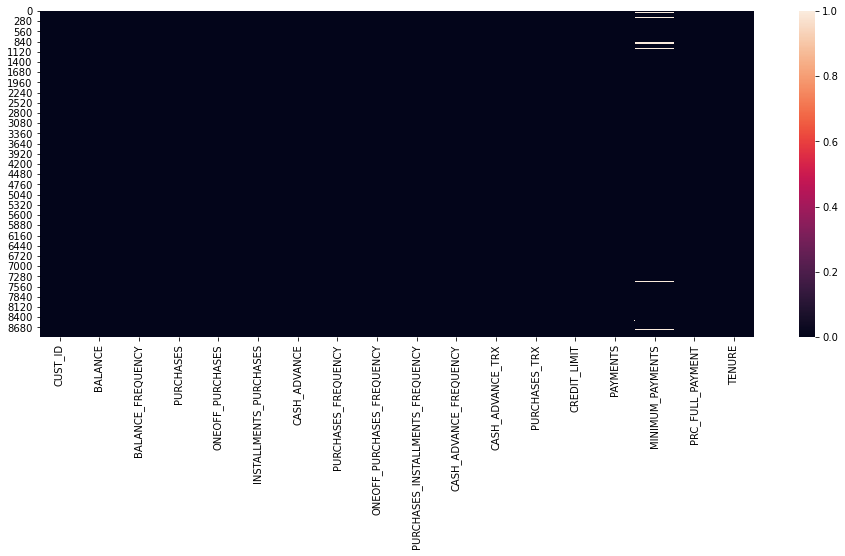

In [7]:
plt.figure(figsize = (16,6))
sns.heatmap(credit_data.isnull());

There are null data in the variables 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT':

In [8]:
credit_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are many ways of replacing null numbers. In this case, the null values will be replaced with the mean as both (credit limit and minimum payments) are continuous variables:

In [9]:
credit_data['MINIMUM_PAYMENTS'].mean()

864.2065423050814

In [10]:
credit_data.loc[(credit_data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = credit_data['MINIMUM_PAYMENTS'].mean()

In [11]:
credit_data['CREDIT_LIMIT'].mean()

4494.449450364621

In [12]:
credit_data.loc[(credit_data['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = credit_data['CREDIT_LIMIT'].mean()

Now just checking if the null values were replaced:

In [13]:
credit_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Checking for duplicated values:

In [14]:
credit_data.duplicated().sum()

0

Custom ID is not an unecessary information that will only add more complexity to the data, as it is an object and not a numerical information. This information will be deleted from the dataset:

In [15]:
credit_data.drop('CUST_ID', axis = 1, inplace = True)

In [16]:
credit_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

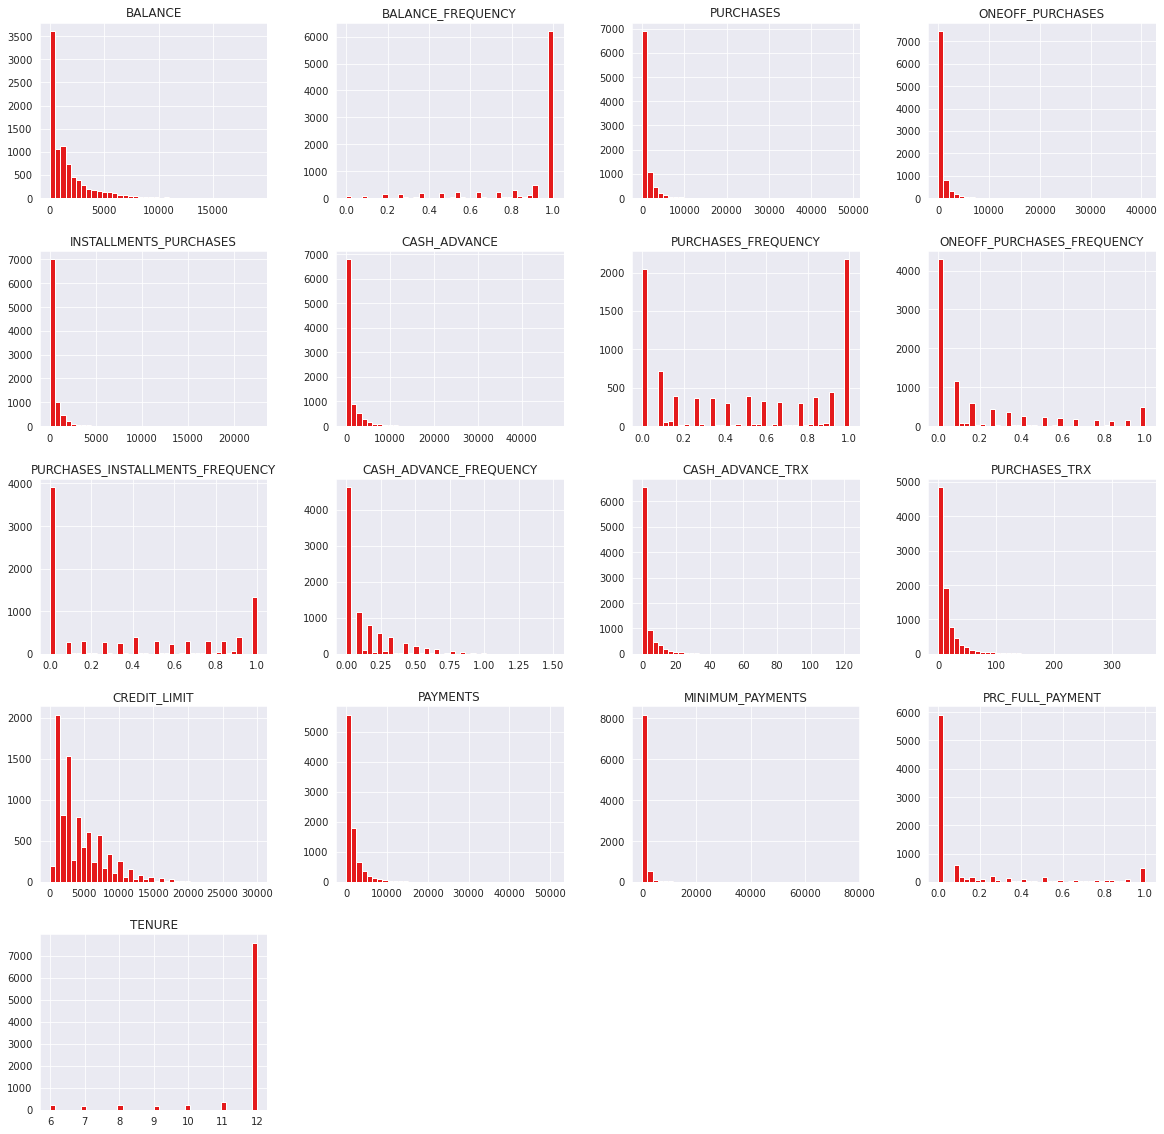

In [17]:
sns.set_palette("Set1")
sns.set_style("darkgrid")
credit_data.hist(bins=40, figsize=(20, 20));

We can extract some insights Ffor some of the most relevant variables:
* BALANCE left in the account is more frequent around 1000 dollars.
* PURCHASES values concentrate below 5000 dollars.
* BALANCE FREQUENCY - we can see that clients frequently update the balance in their accounts. 
* ONEOFF_PURCHASES and INSTALLMENT_PURCHASES - looking at the scale of the graph we notice that purchases with installments are more frequent for values no greater than 5000 dollars and one-off purchases are more frenquent for values no greater than 10000 dollars. 
* PURCHASE FREQUENCY show a segumentation of clients: one group make purchases very frequently, while the other group rarely make purchases. 
* MINIMUM PAYMENTS and PRC FULL PAYMENT - these variables show us that many clients opt for paying the minumum of their credit card bill. Very few clients pay the full bill. This is also good for the bank as taxes are high for credit card bills. 
* TENURE shows that most of the clients are long term clients (more than 12 years)

In [18]:
#plt.figure(figsize=(20,80))
#sns.set_palette("cool_r")
#sns.set_style("darkgrid")
#for i in range(len(credit_data.columns)):
 # plt.subplot(9,2,i+1)
 # sns.distplot(credit_data[credit_data.columns[i]], kde = True)
 # plt.title(credit_data.columns[i])
#plt.tight_layout();

### Visualizing the correlations between variables:

In [19]:
correlations = credit_data.corr()
correlations

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


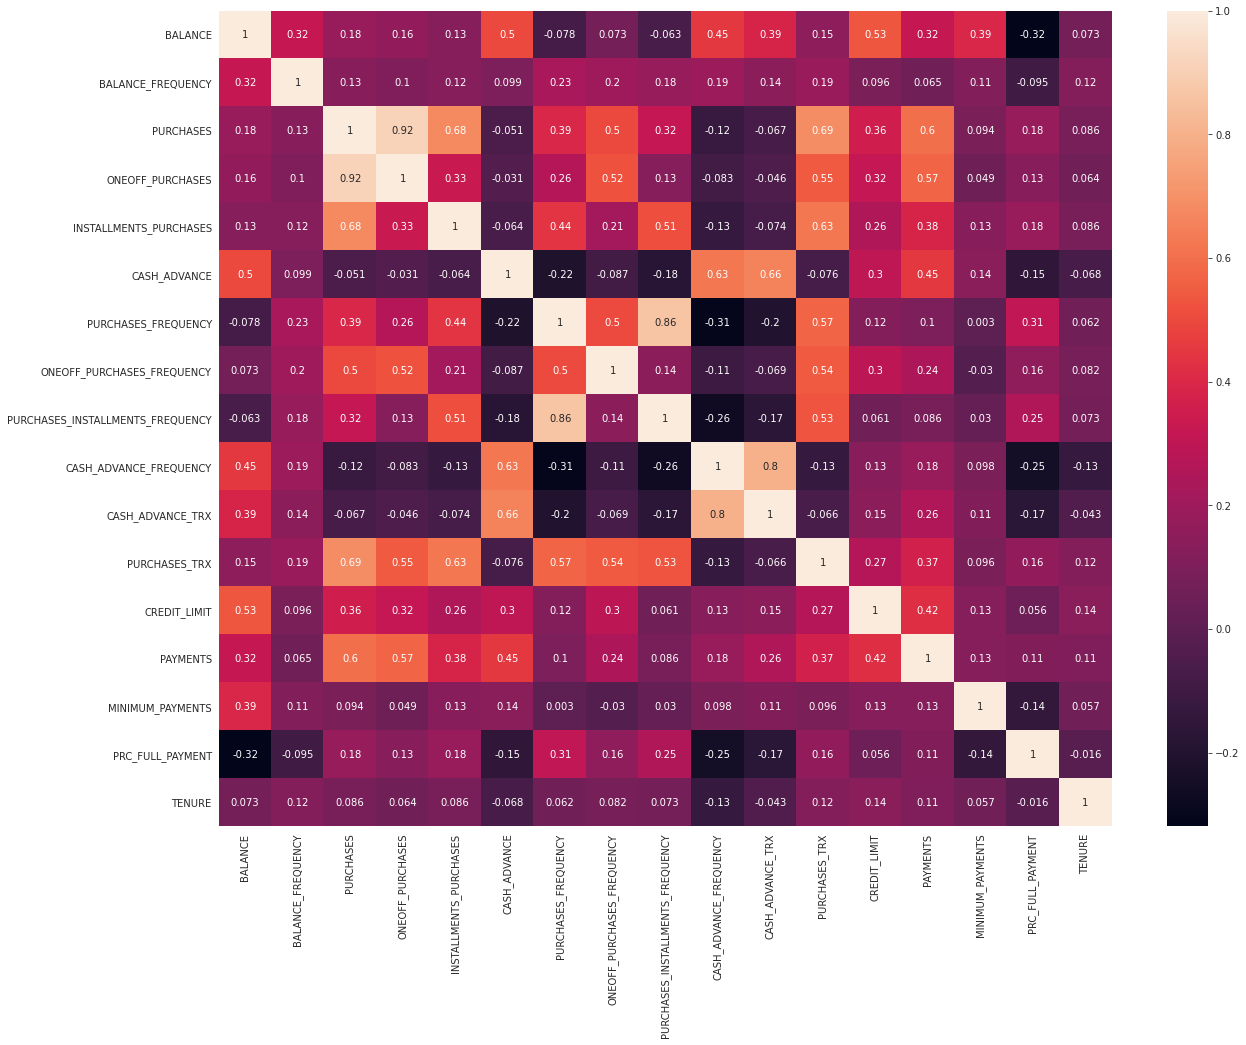

In [20]:
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(correlations, annot=True);

Correlation is stronger as the values approach 1. From the correlation matrix we take that:
* PURCHASE INSTALLMENTS FREQUENCY is somehow correlated to PURCHASES FREQUENCY, and this confirms the insight.
* PURCHASE and ONEOFF PURCHASE are strongly correlated and it seems that most of the purchases values are related to one-off purchases. When we look at INSTALLMENTS PURCHASES correlation with PURCHASES we see that the value is 0.68, not as strong as the correlation with one-off purchases. 

## 3 -  Clustering the data

The unsupervised learning algorithm, Kmeans, will be implemented to group the data in similar groups. 


### Scaling the data before clustering. 
We have data on frequency, which varie from 0 to 1 and data on payments that have a much greater scale. To implement a clustering algorithm it is important to put the data in the same scale, once the distance between the data is taken into account. 


In [21]:
scaler = StandardScaler()
credit_data_scaled = scaler.fit_transform(credit_data)

Checking scaling:

In [22]:
minmax_nonscaled = min(credit_data['BALANCE']), max(credit_data['BALANCE'])
minmax_scaled = min(credit_data_scaled[0]), max(credit_data_scaled[0])

print("Minimum and maximum values before scaling = {}".format(minmax_nonscaled))
print("Minimum and maximum values after scaling = {}".format(minmax_scaled))

Minimum and maximum values before scaling = (0.0, 19043.13856)
Minimum and maximum values after scaling = (-0.9604333444542572, 0.36067954425377496)


### Determining number of clusters with the Elbow Method

To choose the best number of clusters the elbow method will be implemented. This is one of the most popular methods to determine the number of clusters. 

The objective of the elbow method is to minimize WCSS, which measures the within cluster sum of squares. WSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. When WCSS is minimum, you have less variability ofthe data inside the cluster. 

In [23]:
wcss= []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(credit_data_scaled)
  wcss.append(kmeans.inertia_)

In [24]:
print(wcss)

[152149.99999999878, 127785.33027202915, 111986.6134106396, 99073.93826774786, 91502.9619238816, 84852.45300468434, 79528.4008400298, 74491.13092972737, 69879.8046978586, 66461.98902762364, 63632.90948264796, 61355.70596358288, 59165.82029334098, 57498.78336799004, 55832.14302542774, 54778.93596673464, 53023.31440574691, 52022.123820580135, 50807.24264019629]


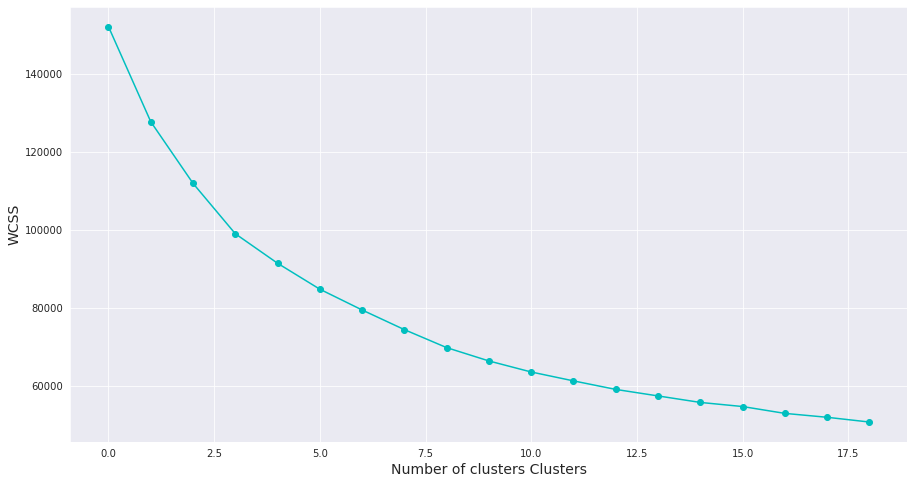

In [25]:
plt.figure(figsize=(15,8)) 
plt.plot(wcss, 'bo-', color='c')
plt.xlabel('Number of clusters Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14);

Using the elbow method it seems that the optimum number of clusters is between 7 and 10. 

### Implementing the number of clusters

Testing the implementation with 8 clusters:

In [26]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(credit_data_scaled)
labels = kmeans.labels_

In [27]:
#Checking the number of clients per label:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1184, 1125,   24,  869,  623,  357, 2754, 2014]))

In [28]:
#Which is the centroid for group ?
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [credit_data.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [credit_data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,105.295586,0.370559,340.224527,202.738159,137.737044,302.795387,0.267868,0.070772,0.189613,0.030814,0.679899,4.290541,3858.394801,1148.896063,265.783554,0.236336,11.783784
1,1293.046983,0.972108,2155.916385,1702.505471,453.410915,290.557467,0.883646,0.769274,0.433448,0.052969,1.011545,30.049734,6085.725819,2164.258830,496.746222,0.282982,11.876554
2,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
3,5076.433617,0.970275,528.597855,327.894591,200.820531,5207.363442,0.298126,0.138918,0.198370,0.519481,16.399077,7.952710,8228.609626,4095.794068,2156.787348,0.039378,11.611303
4,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140
5,3746.033560,0.987242,6332.475350,3586.720840,2747.435182,654.398285,0.957143,0.667074,0.868861,0.079340,2.260504,92.201681,9231.932773,5898.630434,2166.773777,0.226376,11.969188
6,1590.877080,0.972985,240.394985,191.104354,49.470327,782.541833,0.148052,0.084668,0.064662,0.155948,3.062092,2.739288,3392.398935,1011.010482,836.871338,0.020515,11.883079
7,810.486082,0.956180,928.461385,189.357801,739.546898,216.655600,0.889189,0.087855,0.843699,0.040360,0.789082,19.428288,3535.369827,1107.510301,793.764162,0.245759,11.860050


We have the clients segmentment into 8 groups. Let's see some insights:
* GROUP 0: Have less money in their accounts and make less transactions (BALANCE_FREQUENCY = 0.371). They also do not have the custom to ask for cash in advance, having the second lowest average for this (301.6).
* GROUP 2: Have the highest credit card limit (12430 dollars) and have the highest chance of paying the credit card bill on full (PRC_FULL_PAYMENT =0.406). They also have one of the highest purchase frequency. 
* GROUP 4: it is the less likely group to pay the credit card bill on full (PRC_FULL_PAYMENT = 0.001515). It is also the less likely group to make oneoff purchases. **This is also the group with the newest clients (TENURE= 7.24)**
* GROUP 6: Somehow similar to group 2 on the tendency to pay the full credit card bill (PRC_FULL_PAYMENT = 0.288, being second highest). On average they have a credit card limit of 7091 dollars and they also have the second highest oneoff purchases frequency (0.76) only losing to group 2 (0.77). 
* GROUP 7: On average have a high balance available in their accounts (4974 dollars) but they also provide great profit for the bank as they ask for more cash in advance (CASH_ADVANCE = 5192.4). They are less likely to pay the credit card bill on full (PRC_FULL_PAYMENT = 0.040). This may be a group of client that may get into debt more likely. For the bank, this should be considered a group of high risk.

Adding the cluster information to the original dataframe:

In [29]:
credit_data_cluster = pd.concat([credit_data, pd.DataFrame({'GROUP': labels})], axis = 1)
credit_data_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,GROUP
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


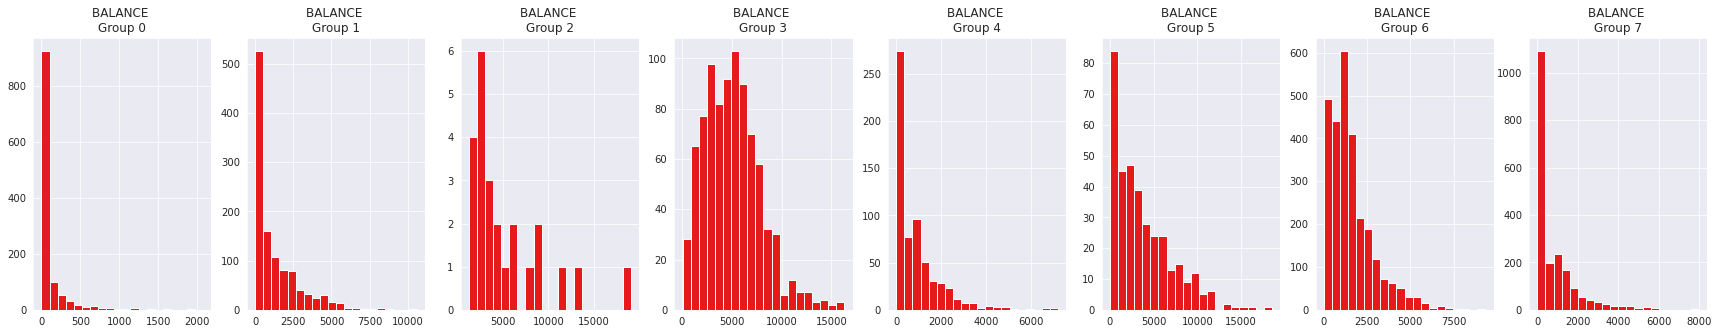

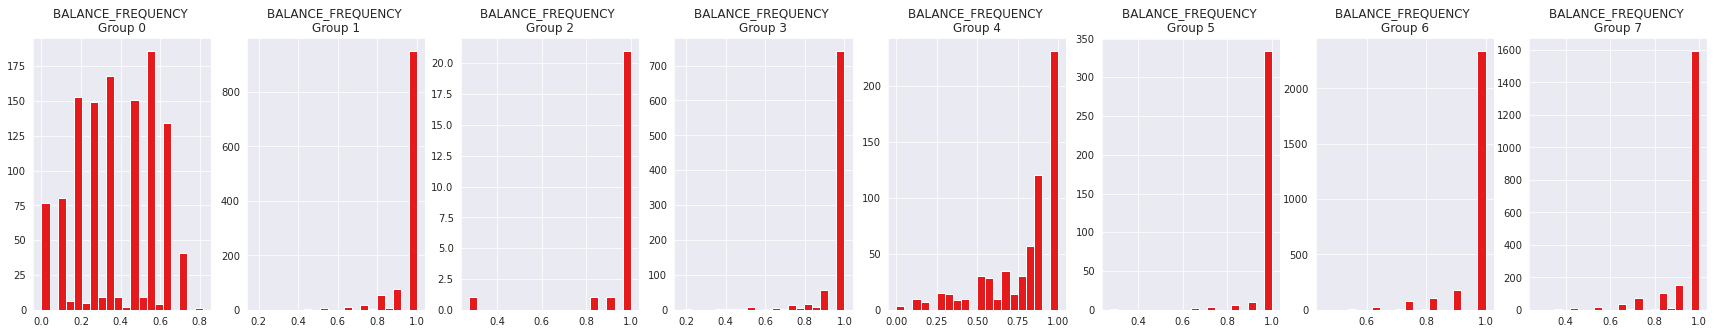

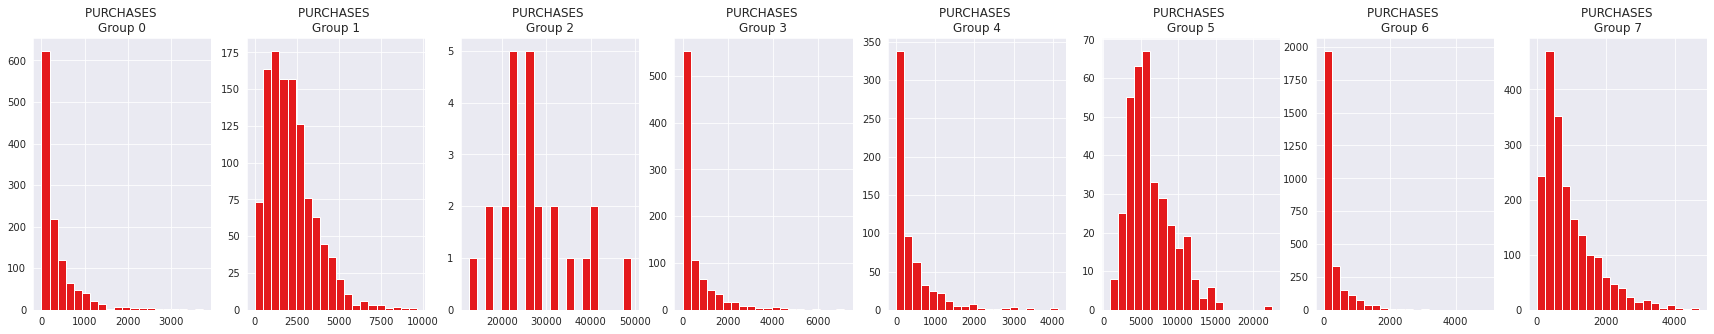

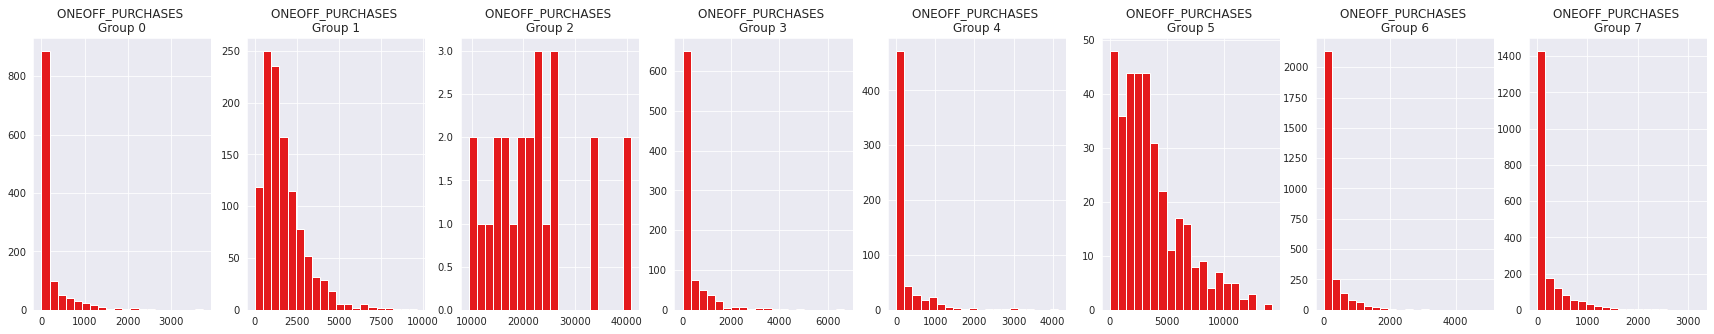

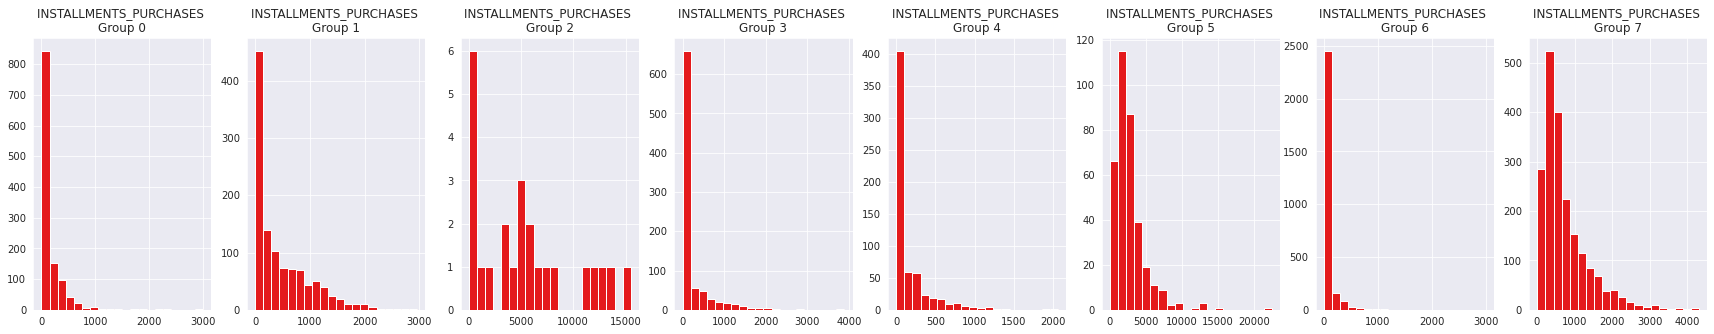

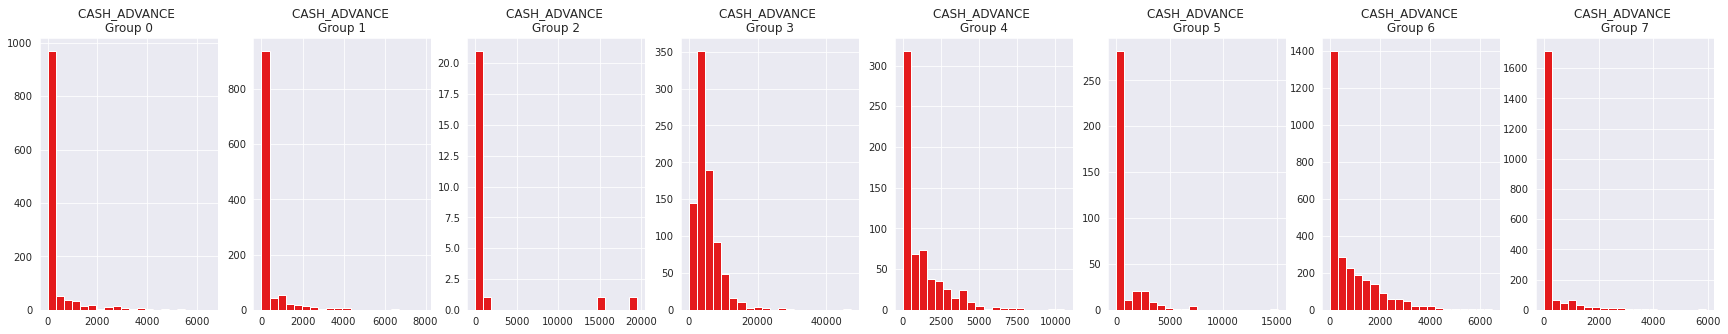

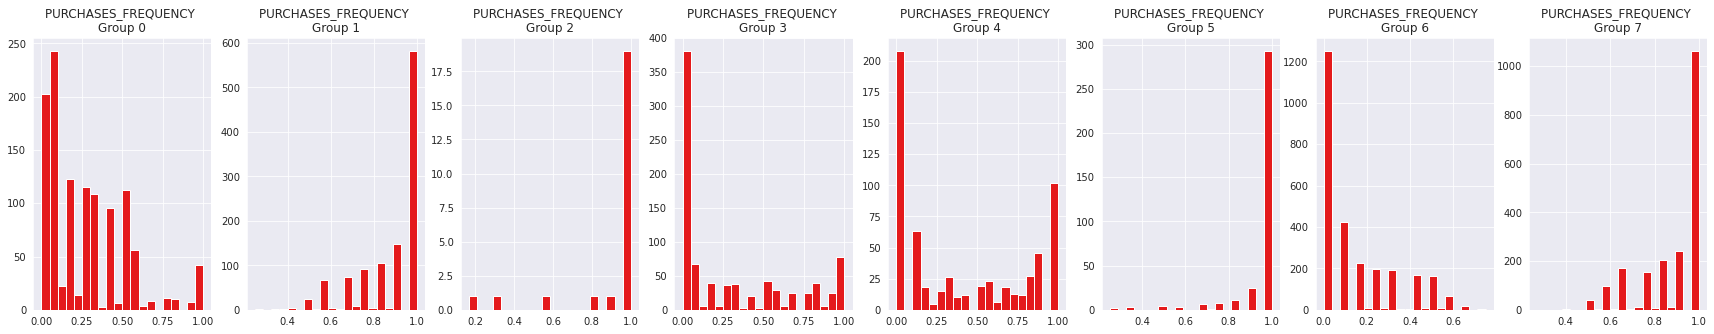

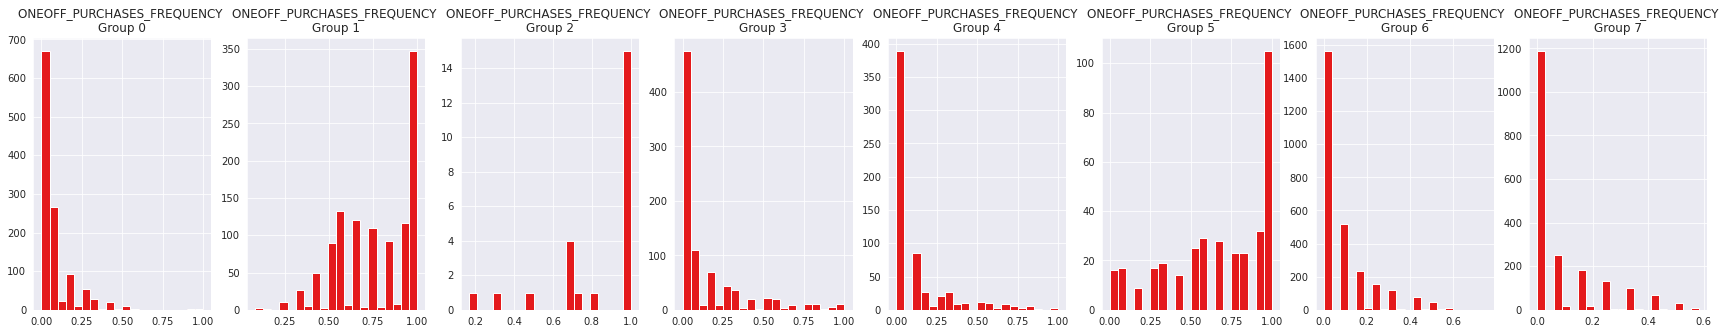

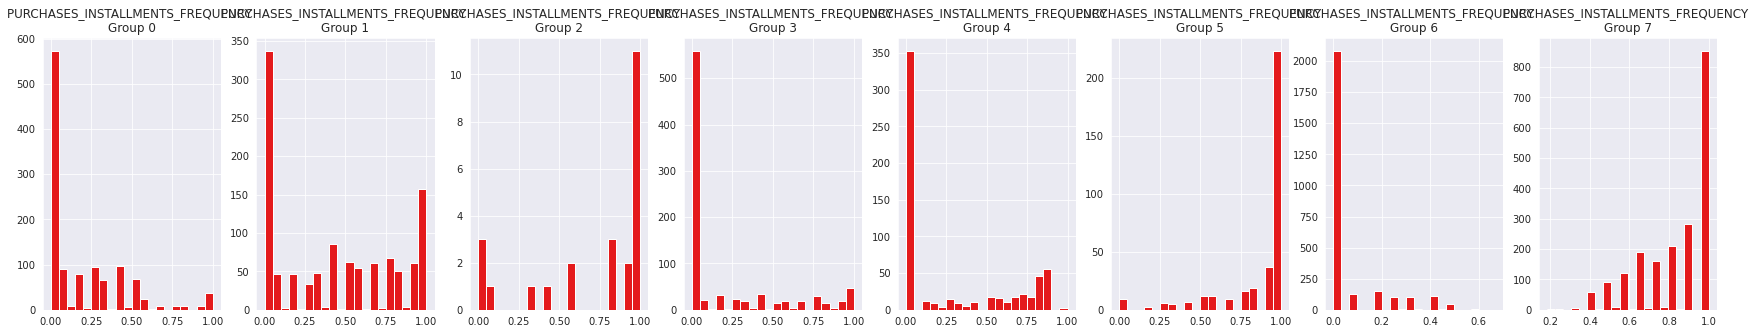

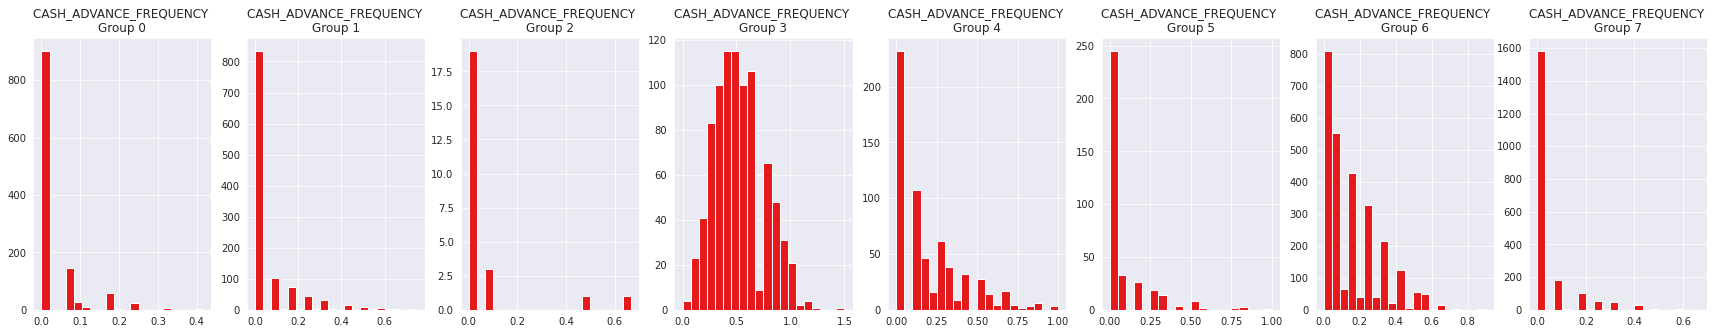

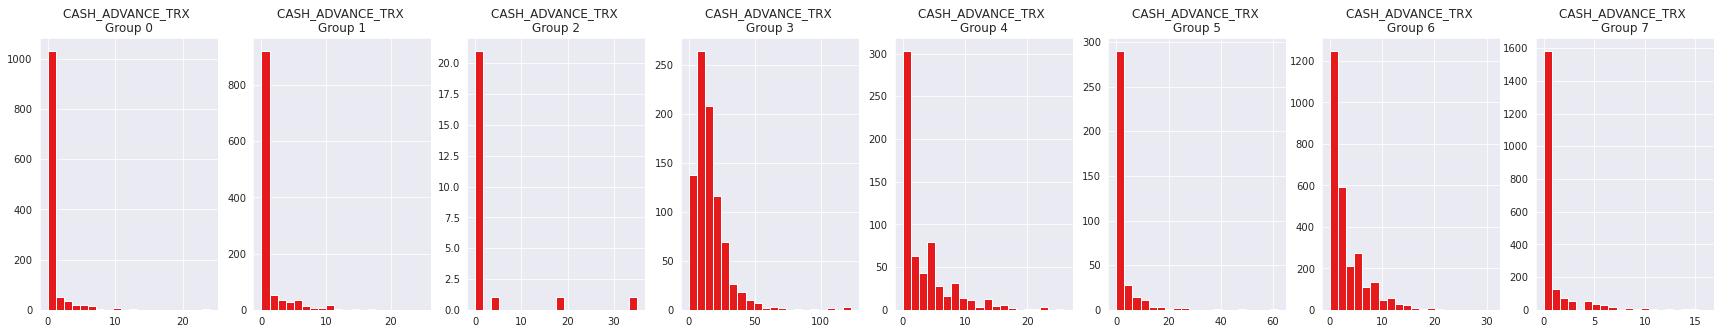

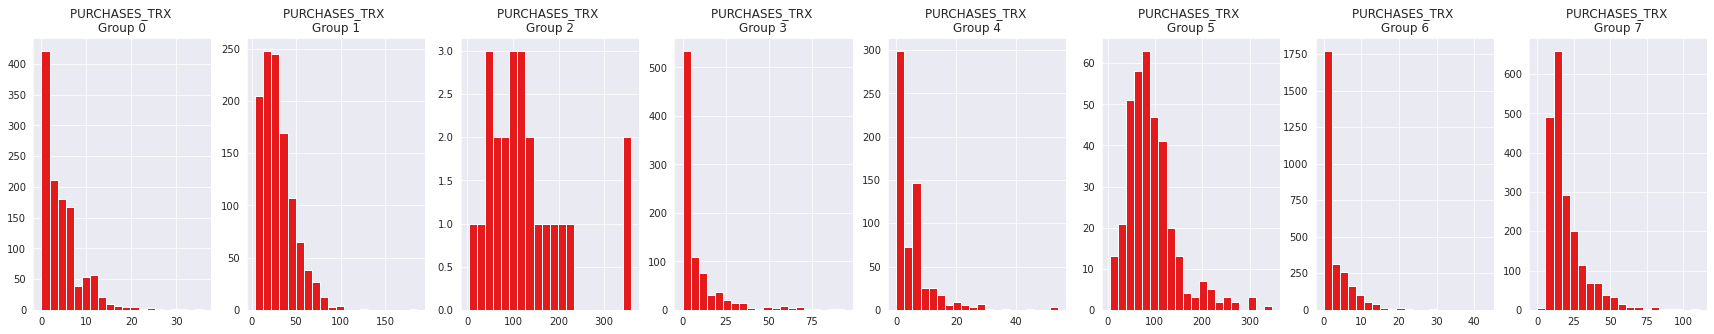

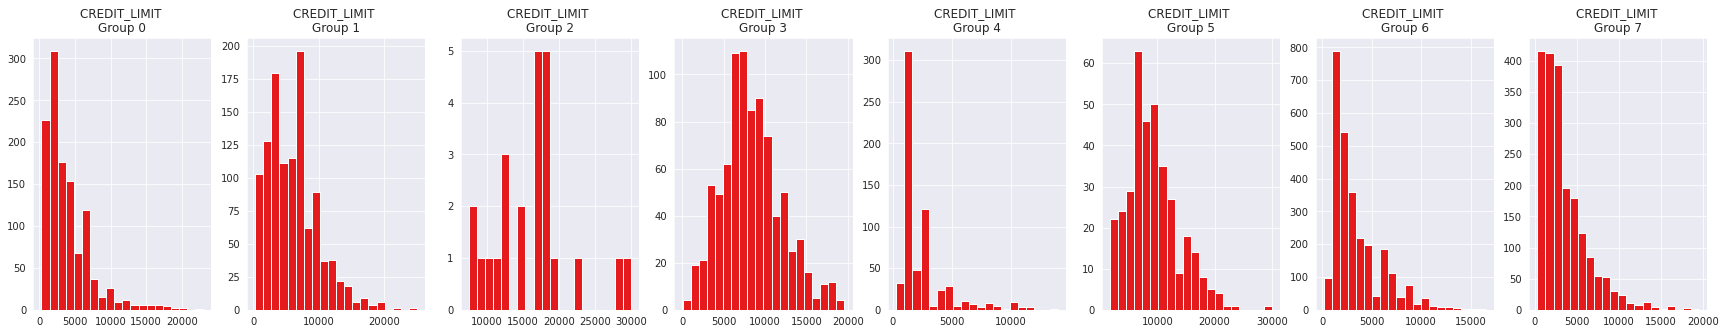

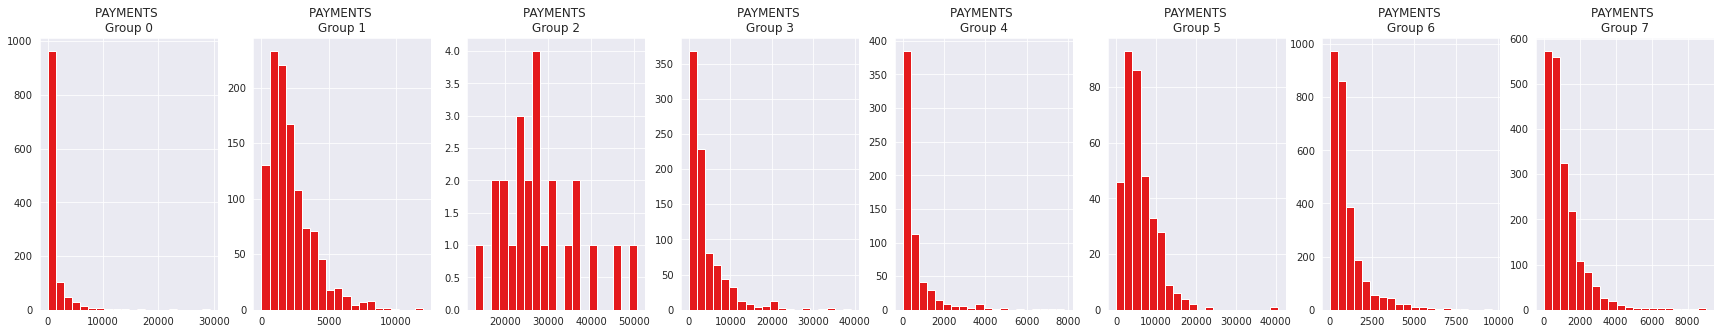

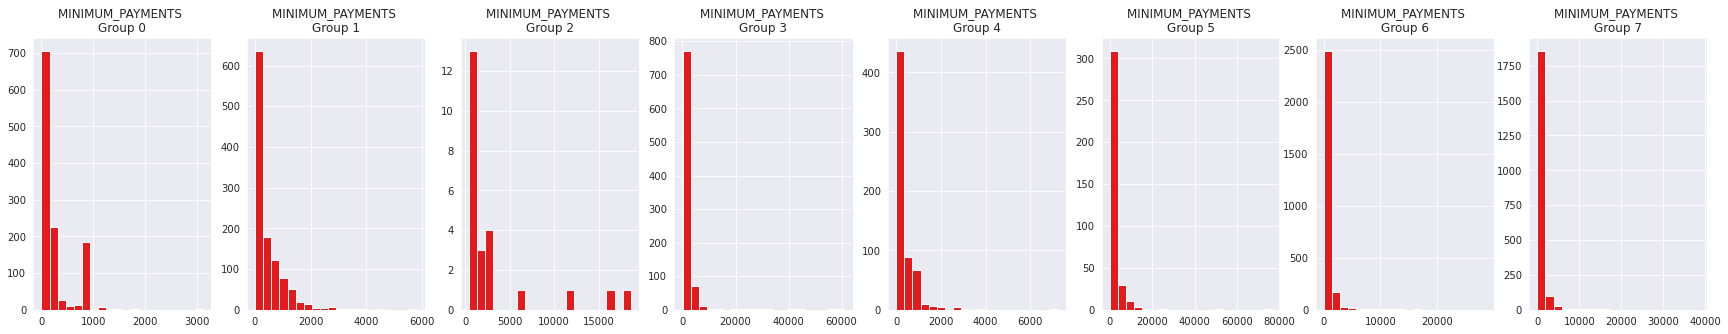

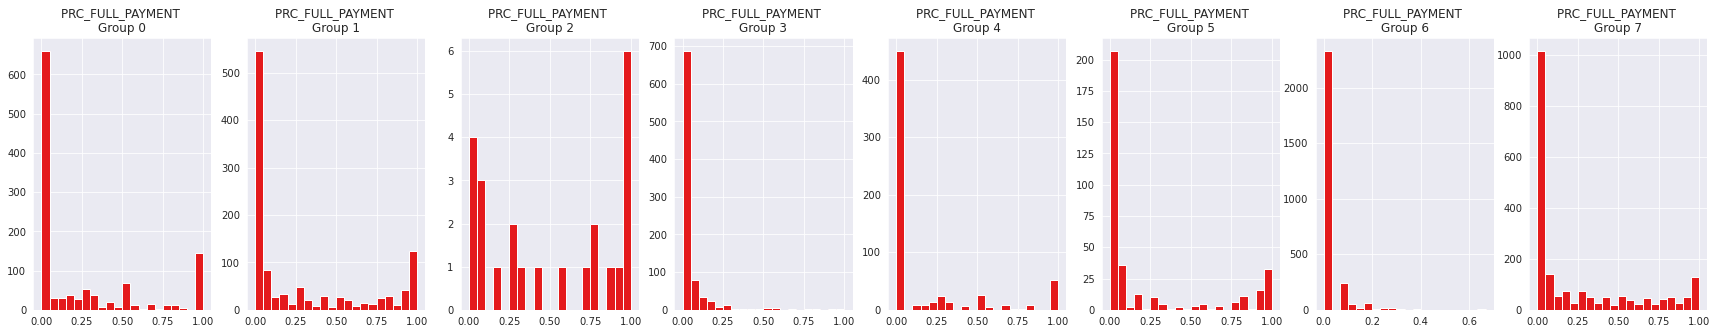

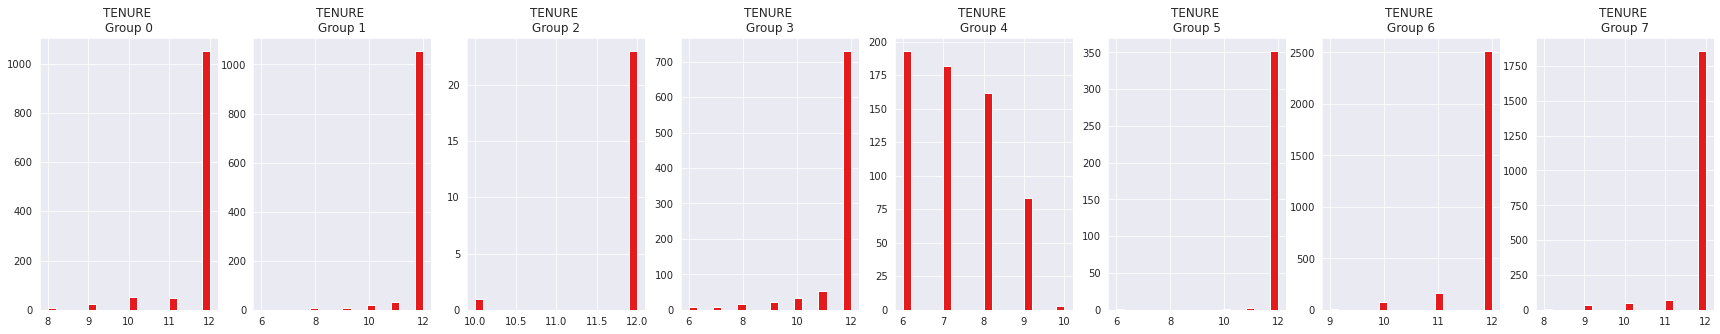

In [30]:
for i in credit_data.columns:
  plt.figure(figsize=(30,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = credit_data_cluster[credit_data_cluster['GROUP'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nGroup {}'.format(i, j))
  plt.show()

#### Ordering the data by group and saving it into a new csv file

In [31]:
ordered_data = credit_data_cluster.sort_values(by = 'GROUP')
ordered_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,GROUP
2628,266.475852,0.272727,0.00,0.00,0.0,1560.735908,0.000000,0.000000,0.000000,0.166667,2,0,1500.0,792.623374,226.586503,0.000000,12,0
6652,173.231650,0.181818,1555.85,1555.85,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,1500.0,8494.566989,1157.992946,0.000000,12,0
3223,509.900317,0.363636,21.00,0.00,21.0,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,11500.0,23150.571840,1863.225391,0.333333,12,0
8152,8.087225,0.363636,515.00,0.00,515.0,0.000000,0.833333,0.000000,0.750000,0.000000,0,17,3000.0,399.456368,14.574311,0.000000,12,0
1157,25.659372,0.181818,951.10,951.10,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,6000.0,865.208858,108.418045,0.000000,12,0


In [32]:
ordered_data.to_csv('group.csv')

## 4 - Principal Component Analysis

In this section, PCA technique will be used for the reduction of the dimensionality. It creates new uncorrelated variables that successively maximize variance. 
By doing this, PCA increases interpretability minimizing information loss. 


In [33]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(credit_data_scaled)
principal_comp

array([[-1.6822201 , -1.07644913],
       [-1.13829793,  2.50649386],
       [ 0.96968511, -0.38352132],
       ...,
       [-0.92620204, -1.81079113],
       [-2.33655012, -0.65797956],
       [-0.55642214, -0.40047925]])

In [34]:
pca_data = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_data.head()

,pca1,pca2
0,-1.682220,-1.076449
1,-1.138298,2.506494
2,0.969685,-0.383521
3,-0.873629,0.043176
4,-1.599433,-0.688583


In [35]:
pca_data = pd.concat([pca_data, pd.DataFrame({'GROUP': labels})], axis = 1)
pca_data.head()

,pca1,pca2,GROUP
0,-1.682220,-1.076449,6
1,-1.138298,2.506494,3
2,0.969685,-0.383521,1
3,-0.873629,0.043176,6
4,-1.599433,-0.688583,6


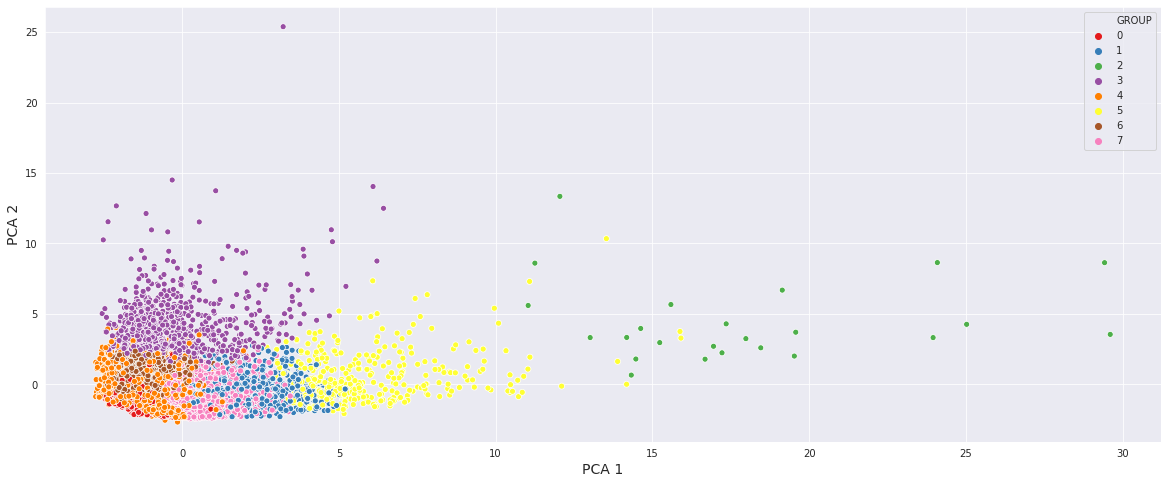

In [36]:
plt.figure(figsize=(20,8))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'GROUP', data = pca_data, palette = 'Set1')
plt.xlabel("PCA 1", fontsize=14)
plt.ylabel("PCA 2", fontsize=14);

## 5- Autoencoders

A technique for reduction of dimensionality as an alternative to PCA or can be used as in conjunction with PCA. Autoencoders are a branch of neural network which attempt to compress the information of the input variables into a reduced dimensional space and then recreate the input data set.


In [37]:
credit_data_scaled.shape

(8950, 17)

In [38]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [39]:
input_data = Input(shape=(17,))
x = Dense(500, activation='relu')(input_data)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [40]:
autoencoder = Model(input_data, decoded)

In [41]:
encoder = Model(input_data, encoded)

In [42]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [43]:
autoencoder.fit(credit_data_scaled, credit_data_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 3s 12ms/step - loss: 0.1680
Epoch 2/50
280/280 [==============================] - 4s 13ms/step - loss: 0.0563
Epoch 3/50
280/280 [==============================] - 3s 12ms/step - loss: 0.0592
Epoch 4/50
280/280 [==============================] - 3s 12ms/step - loss: 0.0490
Epoch 5/50
280/280 [==============================] - 3s 12ms/step - loss: 0.0377
Epoch 6/50
280/280 [==============================] - 3s 12ms/step - loss: 0.0671
Epoch 7/50
280/280 [==============================] - 3s 12ms/step - loss: 0.0329
Epoch 8/50
280/280 [==============================] - 3s 12ms/step - loss: 0.0464
Epoch 9/50
280/280 [==============================] - 3s 12ms/step - loss: 0.0263
Epoch 10/50
280/280 [==============================] - 3s 12ms/step - loss: 0.0183
Epoch 11/50
280/280 [==============================] - 4s 13ms/step - loss: 0.0242
Epoch 12/50
280/280 [==============================] - 4s 13ms/step - loss: 0.0211
Epoch 13/50
2

In [44]:
credit_data_scaled.shape

(8950, 17)

In [45]:
compact_data = encoder.predict(credit_data_scaled)

In [46]:
compact_data.shape

(8950, 10)

In [47]:
credit_data_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [48]:
compact_data[0]

array([1.41227   , 1.2577031 , 0.32804367, 0.19725099, 0.9088783 ,
       0.7600664 , 0.0264864 , 0.10486382, 0.5574219 , 0.25201324],
      dtype=float32)

In [49]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact_data)
  wcss_2.append(kmeans.inertia_)

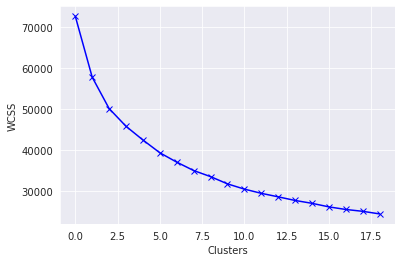

In [50]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

In [51]:
plt.plot(wcss_1, 'bx-', color = 'c')
plt.plot(wcss_2, 'bx-', color = 'm');

NameError: name 'wcss_1' is not defined

In [52]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact_data)

KMeans(n_clusters=4)

In [53]:
labels = kmeans.labels_
labels, labels.shape

(array([2, 0, 2, ..., 0, 0, 0], dtype=int32), (8950,))

In [54]:
data_cluster_at = pd.concat([credit_data, pd.DataFrame({'cluster': labels})], axis = 1)
data_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [55]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact_data)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.915519,-0.251921
1,0.725870,-1.234021
2,-0.822884,0.260292
3,0.278279,-0.307878
4,-0.945694,-0.280822


In [56]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.915519,-0.251921,2
1,0.725870,-1.234021,0
2,-0.822884,0.260292,2
3,0.278279,-0.307878,0
4,-0.945694,-0.280822,2


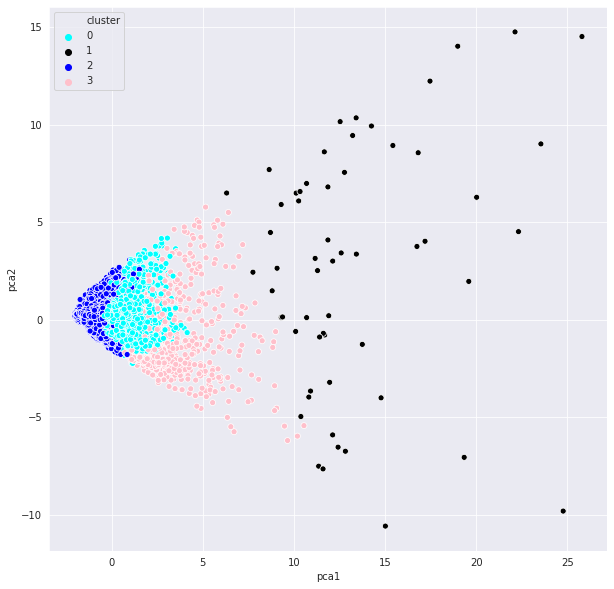

In [57]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['cyan', 'black', 'blue', 'pink']);

In [58]:
df_cluster_ordered = data_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,0
6948,27.539766,0.636364,578.00,0.00,578.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,5000.0,780.002496,153.433604,1.0,12,0
2521,50.006512,0.454545,701.25,0.00,701.25,0.000000,0.333333,0.000000,0.250000,0.000000,0,5,3500.0,1834.431851,132.939468,1.0,12,0
6941,526.858793,0.363636,0.00,0.00,0.00,2359.300912,0.000000,0.000000,0.000000,0.250000,14,0,2500.0,118.044156,470.670338,0.0,12,0
6938,65.458720,1.000000,570.96,0.00,570.96,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,445.823378,84.922938,1.0,6,0


In [59]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4195,2155.276706,1.000000,66.00,66.00,0.0,5478.844017,0.083333,0.083333,0.000000,0.750000,30,1,5000.0,5100.051470,566.549873,0.083333,12,3
4196,5619.654569,1.000000,2457.53,1352.63,1104.9,6088.185478,1.000000,0.571429,0.857143,0.571429,16,35,8000.0,1140.702770,1824.646248,0.000000,7,3
5499,5604.357612,0.909091,0.00,0.00,0.0,6067.586592,0.000000,0.000000,0.000000,0.727273,15,0,6500.0,1255.546074,1542.906309,0.000000,11,3
1016,2128.151695,1.000000,0.00,0.00,0.0,19.345729,0.000000,0.000000,0.000000,0.083333,1,0,2100.0,138.907177,13266.381900,0.000000,12,3
1462,6138.163709,1.000000,0.00,0.00,0.0,7193.574138,0.000000,0.000000,0.000000,0.916667,22,0,11500.0,1337.056317,1654.077219,0.000000,12,3


In [60]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')